<a href="https://colab.research.google.com/github/YoussefMkhaouad/Fece_recognition/blob/master/Face_recognition_videos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Etape1




### Au début,il faut importer les bibliothèques nécessaires

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from keras.utils import np_utils
import itertools
import os

from PIL import Image
from os import listdir
from os.path import isfile, join
import cv2
import os
from pathlib import Path
from os.path import basename

# Etape2

### Construire la base de données

In [0]:

def getFrame(sec):
    dir=listdir('/content/drive/My Drive/test')
    for i in range(len(dir)):

      dd=os.path.join('/content/drive/My Drive/Data', dir[i])
      vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
      hasFrames,image = vidcap.read()
      
      if hasFrames:

         cv2.imwrite(str(x)+'/'+label+str(count)+".jpg", image)     # save frame as JPG file
    return hasFrames

mypath = "/content/drive/My Drive/videos"

videosFiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) and (f.endswith(("mp4")) or f.endswith(("vip"))) ]

count=1
for vid in videosFiles:
    y=list()
    label,extent=os.path.splitext(vid)
    y.append(label)
    vidcap = cv2.VideoCapture(join(mypath,vid)) 
    vidcap.set(cv2.CAP_PROP_FRAME_WIDTH, 255)
    vidcap.set(cv2.CAP_PROP_FRAME_HEIGHT, 255)
    try:

      if not os.path.exists('/content/drive/My Drive/Data'+'/'+label): 

		       os.makedirs('/content/drive/My Drive/test'+'/'+label) 

    except OSError: 
         
	    print ('Error: Creating directory of data')
    dd=os.path.join('/content/drive/My Drive/Data',label)
    x=Path(dd)

    sec = 0
    frameRate =1 #//it will capture image in each 2 second
    success = getFrame(sec)
    while success:
      count = count + 1
      sec = sec + frameRate
      sec = round(sec, 2)
      success = getFrame(sec)
print('Done!!') 

Done!!


# Etape3


*   ### Téléchargement des données
##### Après avoir télechargé l'ensemble de données,il faut normaliser les images 




In [0]:
def extract_image(filename, required_size=(160,160)):
    image = Image.open(filename)
    image = image.convert('RGB')
    pixels = np.asarray(image)
    image = Image.fromarray(pixels)
    image = image.resize(required_size)
    image_array = np.asarray(image)
    return image_array

In [0]:
def load_image(dir):
    images = list()
    # enumerate files
    for filename in os.listdir(dir):
        path = dir + filename
        image = extract_image(path)
        images.append(image)
    return images

def load_dataset(dir):
    # list for faces and labels
    X, y = list(), list()
    for subdir in os.listdir(dir):
        path = dir + subdir + '/'
        images = load_image(path)
        labels = [subdir for i in range(len(images))]
        print("loaded %d sample for class: %s" % (len(images),subdir) ) # print progress
        X.extend(images)
        y.extend(labels)
    return np.asarray(X), np.asarray(y)


In [0]:
pip install split_folders

In [0]:
import split_folders

split_folders.ratio('/content/drive/My Drive/Data', output="/content/drive/My Drive/Split", seed=1337, ratio=(.8, .1, .1))

Copying files: 1340 files [13:45,  1.62 files/s]


In [11]:
trainX, trainy = load_dataset('/content/drive/My Drive/Split/train/')
print(trainX.shape, trainy.shape)
# load test dataset
testX, testy = load_dataset('/content/drive/My Drive/Split/test/')
print(testX.shape, testy.shape)

# save and compress the dataset for further use
np.savez_compressed('faces-dataset.npz', trainX, trainy, testX, testy)

loaded 80 sample for class: alix
loaded 80 sample for class: yousra
loaded 80 sample for class: Locas
loaded 80 sample for class: jenniffer
(320, 160, 160, 3) (320,)
loaded 10 sample for class: alix
loaded 10 sample for class: yousra
loaded 10 sample for class: Locas
loaded 10 sample for class: jenniffer
(40, 160, 160, 3) (40,)


In [12]:
data = np.load('/content/faces-dataset.npz') 

x_train = data['arr_0']
x_train = np.array(x_train,dtype='float32')/255

x_test = data['arr_2']
x_test = np.array(x_test,dtype='float32')/255

y_train= data['arr_1']
y_test= data['arr_3']

import numpy as np

y_test=np.where(y_test=='alix', np.array(1), y_test) 
y_test=np.where(y_test=='yousra', np.array(2), y_test) 
y_test=np.where(y_test=='Locas',np.array(3), y_test)
y_test=np.where(y_test=='jenniffer',np.array(4), y_test)

y_test =y_test.astype(np.int)

#y_train = np.array(y_train)
y_train=np.where(y_train=='alix',np.array(1), y_train) 
y_train=np.where(y_train=='yousra',np.array(2), y_train) 
y_train=np.where(y_train=='Locas',np.array(3), y_train)
y_train=np.where(y_train=='jenniffer',np.array(4), y_train)

y_train =y_train.astype(np.int)

# show the train and test Data format
print('x_train : {}'.format(x_train[:]))
print('Y-train shape: {}'.format(y_test))
print('x_test shape: {}'.format(x_test.shape))



x_train : [[[[0.7058824  0.6901961  0.74509805]
   [0.7019608  0.67058825 0.7411765 ]
   [0.6862745  0.6509804  0.7176471 ]
   ...
   [0.7607843  0.7137255  0.74509805]
   [0.7490196  0.7137255  0.74509805]
   [0.7372549  0.7019608  0.73333335]]

  [[0.70980394 0.69411767 0.7490196 ]
   [0.70980394 0.6784314  0.7411765 ]
   [0.6901961  0.6509804  0.7176471 ]
   ...
   [0.7647059  0.7176471  0.7411765 ]
   [0.7529412  0.7137255  0.7372549 ]
   [0.7411765  0.70980394 0.74509805]]

  [[0.70980394 0.69803923 0.7490196 ]
   [0.70980394 0.6784314  0.74509805]
   [0.6901961  0.65882355 0.7254902 ]
   ...
   [0.7607843  0.72156864 0.7490196 ]
   [0.7529412  0.7176471  0.7411765 ]
   [0.7411765  0.70980394 0.74509805]]

  ...

  [[0.69803923 0.7058824  0.8666667 ]
   [0.7019608  0.7137255  0.8745098 ]
   [0.7058824  0.7176471  0.8745098 ]
   ...
   [0.69411767 0.654902   0.7058824 ]
   [0.69411767 0.64705884 0.7058824 ]
   [0.69411767 0.64705884 0.69411767]]

  [[0.69411767 0.7019608  0.8627451

# Etape4
### Split dataset:Train et Test

In [0]:
x_train, x_valid, y_train, y_valid= train_test_split(
    x_train, y_train, test_size=0.2)

In [14]:
im_rows=160
im_cols=160
batch_size=128
im_shape=(im_rows, im_cols, 3)
x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *im_shape)

print('x_train shape: {}'.format(y_train.shape[0]))
print('x_test shape: {}'.format(y_test.shape))

x_train shape: 256
x_test shape: (40,)


# Etape5
### Construire un modèle CNN
##### CNN a trois couches principales:


1.   Convolotional layer
2.   pooling layer
3.   fully connected layer









In [0]:

from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Dropout, Activation, Flatten 
from keras.layers import Convolution2D, MaxPooling2D,MaxPool2D
import os
import numpy as np


model= Sequential()
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu', input_shape=(160,160,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())          
model.add(Dense(256))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))


model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)



### Affiche les paramètres du modèle.

In [0]:
my_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)             

# Etape6
### Entrainer le modèle

In [16]:
history=model.fit(np.array(x_train), np.array(y_train), batch_size=128,
    epochs=5,
    validation_data=(np.array(x_valid),np.array(y_valid))
)

Train on 256 samples, validate on 64 samples
Epoch 1/5
256/256 [==============================] - 79s 310ms/step - loss: 15.0397 - accuracy: 0.1562 - val_loss: 37.3567 - val_accuracy: 0.2812
Epoch 2/5
256/256 [==============================] - 74s 289ms/step - loss: 20.2139 - accuracy: 0.3789 - val_loss: 1.7666 - val_accuracy: 0.4375
Epoch 3/5
256/256 [==============================] - 74s 289ms/step - loss: 2.6934 - accuracy: 0.3281 - val_loss: 7.6570 - val_accuracy: 0.4375
Epoch 4/5
256/256 [==============================] - 74s 290ms/step - loss: 5.2161 - accuracy: 0.5117 - val_loss: 0.4531 - val_accuracy: 0.9688
Epoch 5/5
256/256 [==============================] - 75s 292ms/step - loss: 0.4400 - accuracy: 0.8398 - val_loss: 0.0859 - val_accuracy: 1.0000


In [17]:

score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0]) #loss
print('Test accuracy:', score[1])

Test score: 0.0774880200624466
Test accuracy: 1.0


In [18]:
predicted =np.array(model.predict(x_test))

ynew = model.predict_classes(x_test)

Acc=accuracy_score(y_test, ynew)
print("accuracy : ",Acc)

accuracy :  1.0


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


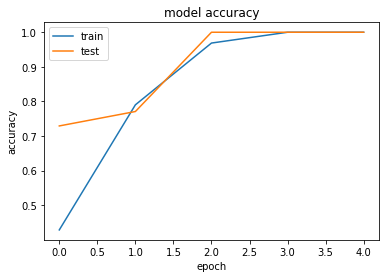

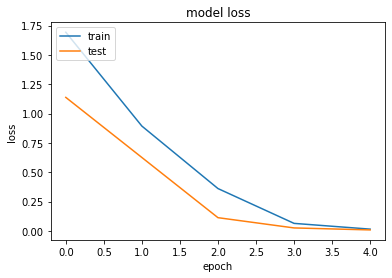

In [0]:
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
my_model.save("model.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
from keras.models import load_model
face_model = load_model('/content/model.h5')


In [0]:
def get_embedding(model, face):
    # scale pixel values
    face = face.astype('float32')
    # standardization
    mean, std = face.mean(), face.std()
    face = (face-mean)/std
    # transfer face into one sample (3 dimension to 4 dimension)
    sample = np.expand_dims(face, axis=0)
    # make prediction to get embedding
    yhat = my_model.predict(sample)
    return yhat[0]
    
# convert each face in the train set into embedding
x_train = list()
for face in trainX:
    emd = get_embedding(face_model, face)
    x_train.append(emd)
emd.shape    